In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
data.fillna(0, inplace=True)

In [5]:
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'M' else 0)
data['ssc_b'] = data['ssc_b'].apply(lambda x: 1 if x == 'Central' else 0)
data['hsc_b'] = data['hsc_b'].apply(lambda x: 1 if x == 'Central' else 0)
data['hsc_s'] = data['hsc_s'].map({'Commerce': 0, 'Science': 1, 'Arts': 2})
data['degree_t'] = data['degree_t'].map({'Comm&Mgmt': 0, 'Sci&Tech': 1, 'Others': 2})
data['workex'] = data['workex'].apply(lambda x: 1 if x == 'Yes' else 0)
data['specialisation'] = data['specialisation'].map({'Mkt&HR': 0, 'Mkt&Fin': 1})
data['status'] = data['status'].map({'Not Placed': 0, 'Placed': 1})

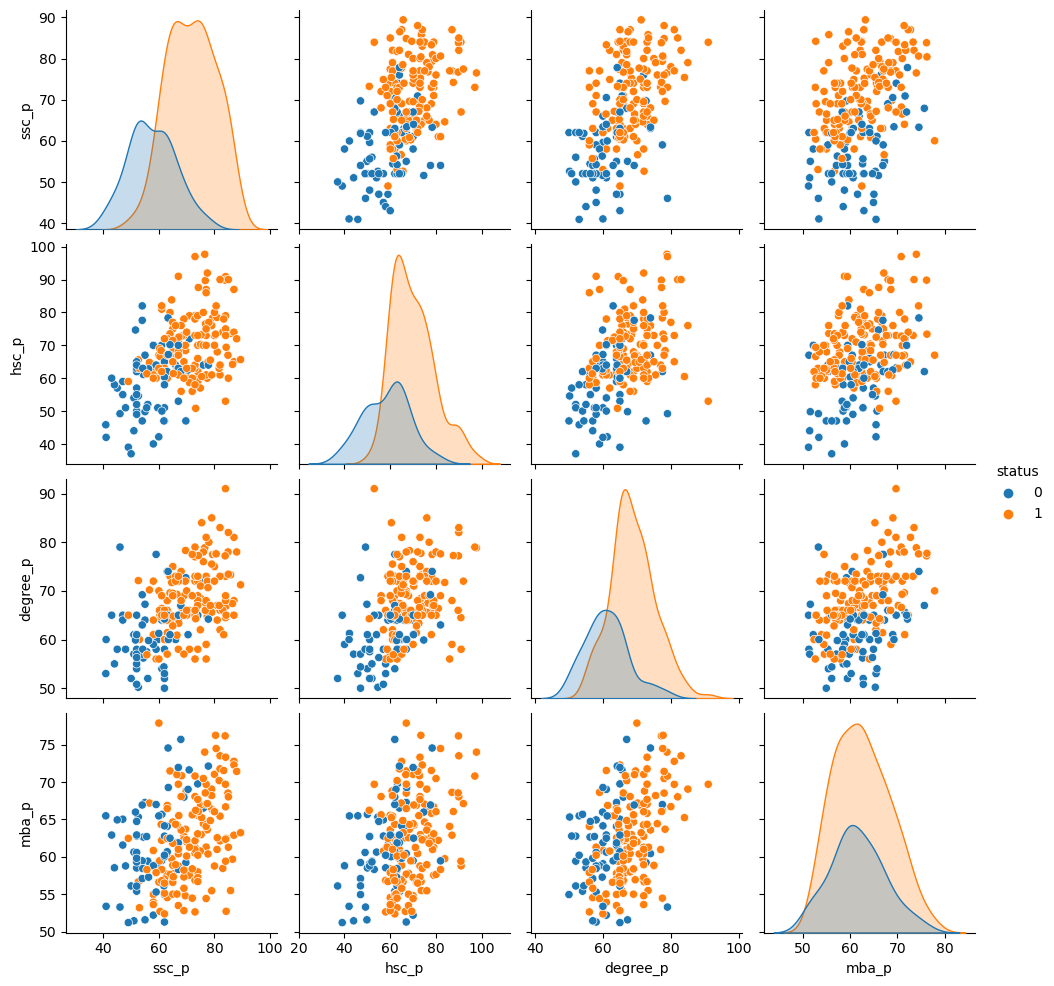

In [6]:
sns.pairplot(data[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'status']], hue='status')
plt.show()

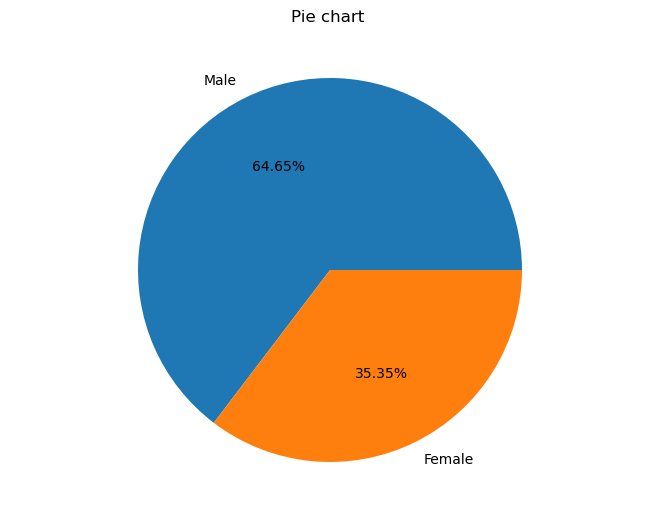

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = ['Male','Female']
students = [139,76]
ax.pie(students, labels = gender,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

## we see the above pie chart easly to know the percentage of the female placed percentage is 35.35%, and male placed percentage is 64.65% or not placed student percentage is 31.17%

In [37]:
X = data.drop(['sl_no', 'status', 'salary'], axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5  7]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.81      0.94      0.87        31

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43



In [43]:
import joblib
model_filename = 'trained_model.pkl'
joblib.dump(model, model_filename)

['trained_model.pkl']